# Proyek Analisis Data: [Ecommerce]
- **Nama:** Luqman Fadhlul Haq
- **Email:** luqmanfad26@gmail.com
- **ID Dicoding:** luqmanfh

## Menentukan Pertanyaan Bisnis

- Metode Pembayaran yang Paling Sering Digunakan:
- Kategori Produk dengan pendapatan tertinggi


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# direktori file csv
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/ecommerce/"

# membuka dataset
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
geolocations = pd.read_csv(data_dir + 'olist_geolocation_dataset.csv')
items = pd.read_csv(data_dir + 'olist_order_items_dataset.csv')
payments = pd.read_csv(data_dir + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(data_dir + 'olist_orders_dataset.csv')
products = pd.read_csv(data_dir + 'olist_products_dataset.csv')
sellers = pd.read_csv(data_dir + 'olist_sellers_dataset.csv')
productcategory = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'customers':customers,
        'geolocations':geolocations,
        'items':items,
        'payments':payments,
        'reviews':reviews,
        'orders':orders,
        'products':products,
        'sellers':sellers,
        'productcategory':productcategory}

data['customers'].head()

Mounted at /content/drive


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['geolocations'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['productcategory'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [ ]:
# menilai data
for df_name, df in data.items():
    print(f"\nDataFrame: {df_name}")
    df.info()


DataFrame: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

DataFrame: geolocations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

In [ ]:
duplicate_counts = {}
total = {}

for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total[df_name] = len(df)

    print(f"\nDataFrame: {df_name}")
    print(f"Jumlah data duplikat: {duplicate_counts[df_name]}")
    print(f"Jumlah total data: {total[df_name]}")



DataFrame: customers
Jumlah data duplikat: 0
Jumlah total data: 99441

DataFrame: geolocations
Jumlah data duplikat: 261831
Jumlah total data: 1000163

DataFrame: items
Jumlah data duplikat: 0
Jumlah total data: 112650

DataFrame: payments
Jumlah data duplikat: 0
Jumlah total data: 103886

DataFrame: reviews
Jumlah data duplikat: 0
Jumlah total data: 99224

DataFrame: orders
Jumlah data duplikat: 0
Jumlah total data: 99441

DataFrame: products
Jumlah data duplikat: 0
Jumlah total data: 32951

DataFrame: sellers
Jumlah data duplikat: 0
Jumlah total data: 3095

DataFrame: productcategory
Jumlah data duplikat: 0
Jumlah total data: 71


In [ ]:
null_counts = {}

for df_name, df in data.items():
    null_counts[df_name] = df.isnull().sum()
    print(f"\nDataFrame: {df_name}")
    print(f"Jumlah data null: {null_counts[df_name]}")


DataFrame: customers
Jumlah data null: customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

DataFrame: geolocations
Jumlah data null: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

DataFrame: items
Jumlah data null: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

DataFrame: payments
Jumlah data null: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

DataFrame: reviews
Jumlah data null: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656


### Cleaning Data

In [ ]:
for key, value in data.items():
    for col in value.columns:
        # print only col names where there are nans
        if value[col].isnull().sum():
            print(col + ' = ' + str((sum(value[col].isnull()))))
            print(col + ' = ' + str((sum(value[col].isnull())/len(value))*100) + '%\n')

review_comment_title = 87656
review_comment_title = 88.34153027493349%

review_comment_message = 58247
review_comment_message = 58.70253164556962%

order_approved_at = 160
order_approved_at = 0.1608994278014099%

order_delivered_carrier_date = 1783
order_delivered_carrier_date = 1.7930229985619612%

order_delivered_customer_date = 2965
order_delivered_customer_date = 2.981667521444877%

product_category_name = 610
product_category_name = 1.8512336499650999%

product_name_lenght = 610
product_name_lenght = 1.8512336499650999%

product_description_lenght = 610
product_description_lenght = 1.8512336499650999%

product_photos_qty = 610
product_photos_qty = 1.8512336499650999%

product_weight_g = 2
product_weight_g = 0.006069618524475737%

product_length_cm = 2
product_length_cm = 0.006069618524475737%

product_height_cm = 2
product_height_cm = 0.006069618524475737%

product_width_cm = 2
product_width_cm = 0.006069618524475737%



In [ ]:
null_delivery = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_delivery)].index, inplace = True)

## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
data['customers'].head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP


In [ ]:
data['customers'].groupby('customer_state')['customer_id'].count().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [ ]:
geolocations.head(4)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP


In [ ]:
data['geolocations'].groupby('geolocation_state')['geolocation_lat'].count().sort_values(ascending=False)

,geolocation_lat
geolocation_state,
SP,404268
MG,126336
RJ,121169
RS,61851
PR,57859
SC,38328
BA,36045
GO,20139
ES,16748


In [ ]:
orders.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00


In [ ]:
data['orders'].groupby('order_id')['customer_id'].count().sort_values(ascending=False)

,customer_id
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
ab2e18197d676ace96bcaab0aeb2a820,1
ab30f8d4ebb7d33d1dcf54d420ea42cd,1
ab30f399d360ddf62897051d813f887d,1
ab30819331b8ee6115370bcfa01a8350,1
...,...
555abbd521ea234b5a6b908bb132244b,1
5559edd02dabfec0a6ee808960297d1b,1
55595283657c40a4e48711b28049056e,1


In [ ]:
# merge customers and orders

customers_orders = pd.merge(data['customers'], data['orders'], on='customer_id')
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling sering digunakan?

---

banyak dibeli?

<ipython-input-23-f24be2f47055>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='payment_type', data=payment_counts, palette='coolwarm')


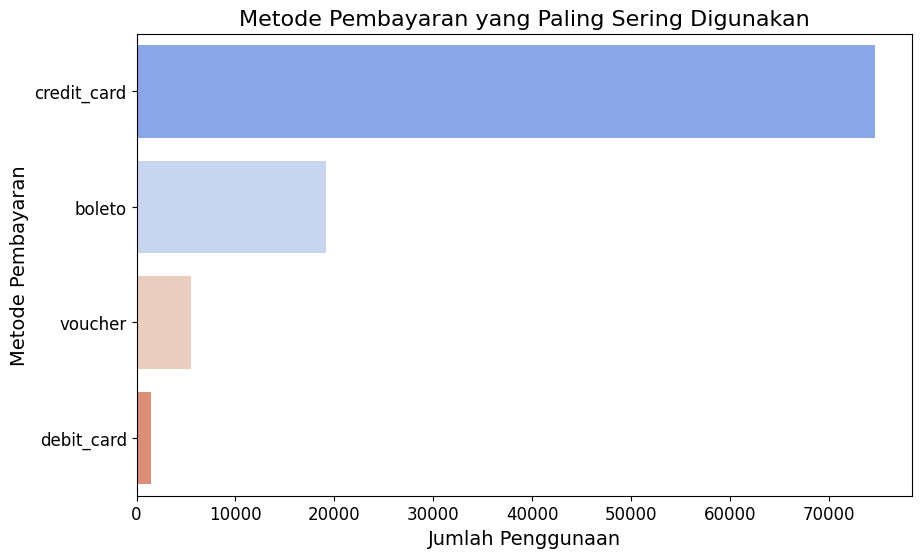

In [ ]:
# menghitung jumlah penggunaan setiap metode pembayaran
payment_counts = payments.groupby('payment_type')['payment_type'].count().reset_index(name='count')

# urutkan metode pembayaran berdasarkan jumlah penggunaannya
payment_counts = payment_counts.sort_values(by='count', ascending=False)

# visualisasi metode pembayaran yang paling sering digunakan
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='payment_type', data=payment_counts, palette='coolwarm')
plt.title('Metode Pembayaran yang Paling Sering Digunakan', fontsize=16)
plt.xlabel('Jumlah Penggunaan', fontsize=14)
plt.ylabel('Metode Pembayaran', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pertanyaan 2: Kategori Produk dengan Pendapatan Tertinggi

<ipython-input-24-8cb46a343630>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_category_name', data=category_revenue.head(10), palette='Blues_r')


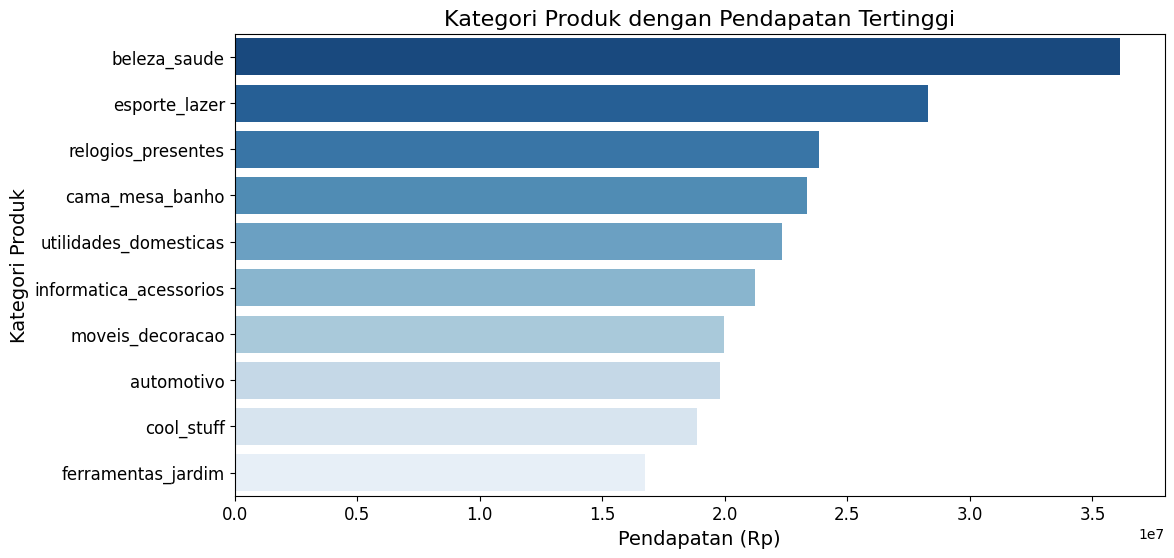

In [ ]:
# Menggabungkan data items dengan products
items_with_products = items.merge(products, on='product_id', how='left')

# Menghitung total pendapatan untuk setiap kategori produk
items_with_products['revenue'] = items_with_products['price'] * items_with_products['freight_value']
category_revenue = items_with_products.groupby('product_category_name')['revenue'].sum().reset_index()

# Urutkan berdasarkan pendapatan tertinggi
category_revenue = category_revenue.sort_values(by='revenue', ascending=False)

# Visualisasi kategori dengan pendapatan tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='product_category_name', data=category_revenue.head(10), palette='Blues_r')
plt.title('Kategori Produk dengan Pendapatan Tertinggi', fontsize=16)
plt.xlabel('Pendapatan (Rp)', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Conclusion

- Metode Pembayaran yang Paling Sering Digunakan:

Berdasarkan analisis dan visualisasi, metode pembayaran yang paling sering digunakan oleh pelanggan adalah menggunakan credit card, yang diikuti oleh boleto dan voucher.

- Kategori Produk dengan pendapatan tertinggi

Dari analisis mengenai kategori produk dengan pendapatan tertinggi, kategori ferramentas jardim muncul sebagai yang paling menguntungkan, diikuti oleh cama mesa banho dan moveis decoraco.


In [ ]:
# Assuming you want to combine all the dataframes into one
# First, choose the common column for merging (e.g., 'order_id')

# Create a list of dataframes to merge, excluding 'geolocations' and 'productcategory' if they don't have 'order_id'
dfs_to_merge = [data['customers'], data['orders'], data['items'], data['payments'], data['reviews'], data['products'], data['sellers']]

# Perform the merge, starting with the first two dataframes
all_df = dfs_to_merge[0].merge(dfs_to_merge[1], on='customer_id', how='left')

# Continue merging with the remaining dataframes using the appropriate 'on' column
for df in dfs_to_merge[2:]:
    if 'order_id' in df.columns:
        all_df = all_df.merge(df, on='order_id', how='left')
    elif 'product_id' in df.columns:
        all_df = all_df.merge(df, on='product_id', how='left')
    elif 'seller_id' in df.columns:
        all_df = all_df.merge(df, on='seller_id', how='left')
    else:
        print(f"Skipping dataframe {df} as it doesn't have a common column for merging.")

all_df.to_csv("all_data.csv", index=False)